In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('csvs/medical_conditions_dataset.csv')
df=df.dropna()
df

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
22,23,User0023,49.0,male,Non-Smoker,28.025453,119.212083,150.628025,Pneumonia
63,64,User0064,43.0,male,Non-Smoker,34.978378,107.052200,190.482674,Diabetic
84,85,User0085,52.0,male,Smoker,25.024378,131.071030,185.997004,Diabetic
89,90,User0090,70.0,male,Smoker,39.249085,113.848795,124.264664,Pneumonia
153,154,User0154,66.0,male,Smoker,24.333718,173.787158,130.727447,Diabetic
...,...,...,...,...,...,...,...,...,...
9926,9927,User9927,87.0,male,Non-Smoker,27.603302,166.616097,110.249436,Diabetic
9953,9954,User9954,66.0,female,Non-Smoker,35.321225,178.932557,124.810876,Diabetic
9955,9956,User9956,68.0,male,Non-Smoker,36.083177,150.425038,115.163399,Diabetic
9967,9968,User9968,67.0,male,Non-Smoker,36.682144,150.168146,194.475850,Pneumonia


In [3]:
print(df.columns)
print(df.index)
df.shape

Index(['id', 'full_name', 'age', 'gender', 'smoking_status', 'bmi',
       'blood_pressure', 'glucose_levels', 'condition'],
      dtype='object')
Index([  22,   63,   84,   89,  153,  175,  184,  187,  256,  264,
       ...
       9835, 9846, 9849, 9870, 9886, 9926, 9953, 9955, 9967, 9978],
      dtype='int64', length=446)


(446, 9)

In [4]:
gender_map = {'male': 1, 'female': 0}
df['gender_encoded'] = df['gender'].map(gender_map)

smoker_map = {'Smoker': 1, 'Non-Smoker': 0}
df['smoking_status_encoded'] = df['smoking_status'].map(smoker_map)

condition_dummies = pd.get_dummies(df['condition'], prefix='condition')

df_final = pd.concat([df, condition_dummies], axis=1)
df_final 

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition,gender_encoded,smoking_status_encoded,condition_Cancer,condition_Diabetic,condition_Pneumonia
22,23,User0023,49.0,male,Non-Smoker,28.025453,119.212083,150.628025,Pneumonia,1,0,False,False,True
63,64,User0064,43.0,male,Non-Smoker,34.978378,107.052200,190.482674,Diabetic,1,0,False,True,False
84,85,User0085,52.0,male,Smoker,25.024378,131.071030,185.997004,Diabetic,1,1,False,True,False
89,90,User0090,70.0,male,Smoker,39.249085,113.848795,124.264664,Pneumonia,1,1,False,False,True
153,154,User0154,66.0,male,Smoker,24.333718,173.787158,130.727447,Diabetic,1,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,9927,User9927,87.0,male,Non-Smoker,27.603302,166.616097,110.249436,Diabetic,1,0,False,True,False
9953,9954,User9954,66.0,female,Non-Smoker,35.321225,178.932557,124.810876,Diabetic,0,0,False,True,False
9955,9956,User9956,68.0,male,Non-Smoker,36.083177,150.425038,115.163399,Diabetic,1,0,False,True,False
9967,9968,User9968,67.0,male,Non-Smoker,36.682144,150.168146,194.475850,Pneumonia,1,0,False,False,True


In [5]:
df_final.columns

Index(['id', 'full_name', 'age', 'gender', 'smoking_status', 'bmi',
       'blood_pressure', 'glucose_levels', 'condition', 'gender_encoded',
       'smoking_status_encoded', 'condition_Cancer', 'condition_Diabetic',
       'condition_Pneumonia'],
      dtype='object')

In [8]:
df_final.drop(['id','gender', 'smoking_status','condition'], axis=1, inplace=True)  #removed other categories that are not needed
df_final

,age,bmi,blood_pressure,glucose_levels,gender_encoded,smoking_status_encoded,condition_Cancer,condition_Diabetic,condition_Pneumonia
22,49.0,28.025453,119.212083,150.628025,1,0,False,False,True
63,43.0,34.978378,107.052200,190.482674,1,0,False,True,False
84,52.0,25.024378,131.071030,185.997004,1,1,False,True,False
89,70.0,39.249085,113.848795,124.264664,1,1,False,False,True
153,66.0,24.333718,173.787158,130.727447,1,1,False,True,False
...,...,...,...,...,...,...,...,...,...
9926,87.0,27.603302,166.616097,110.249436,1,0,False,True,False
9953,66.0,35.321225,178.932557,124.810876,0,0,False,True,False
9955,68.0,36.083177,150.425038,115.163399,1,0,False,True,False
9967,67.0,36.682144,150.168146,194.475850,1,0,False,False,True



--- Smoking Status Prediction Model Performance ---
Overall Accuracy: 88.39%

Classification Report:
              precision    recall  f1-score   support

  Non-Smoker       0.88      1.00      0.94        99
      Smoker       0.00      0.00      0.00        13

    accuracy                           0.88       112
   macro avg       0.44      0.50      0.47       112
weighted avg       0.78      0.88      0.83       112

Confusion Matrix:


C:\Users\Anay Shah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Anay Shah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Anay Shah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\m

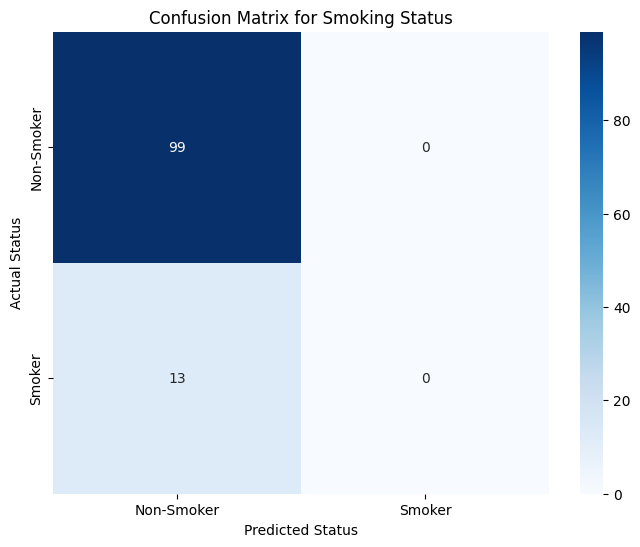

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df_final.drop('smoking_status_encoded', axis=1)
y = df_final['smoking_status_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(f"\n--- Smoking Status Prediction Model Performance ---")
print(f"Overall Accuracy: {accuracy:.2%}\n")

print("Classification Report:")
print(classification_report(y_test, predictions, target_names=['Non-Smoker', 'Smoker']))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted Status')
plt.ylabel('Actual Status')
plt.title('Confusion Matrix for Smoking Status')
plt.show()